<a href="https://colab.research.google.com/github/thanktua-spp/machine-learning-fundamentals/blob/main/Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Concept Development

## 1. Toy Data Generation and Visualization

In this introductory Section, we will generate a set of toy data set with linear relationship easy enough to train a simple linear regression model algorithm.


# 1.1 Import packages

Two very standard packages used for numeric computing are,

*   Numpy: A numeric computing library for easy array manipulation https://numpy.org/. 

*   Matplotlib: A plotting and visualization library https://matplotlib.org/.



In [ ]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Create Toy data

In [ ]:
# Toy data creation

## X data using 11 samples
X = np.linspace(4, 9, 11)
print(f'X-data = {X}')


## initial y data (Input-Output relationship) as function of X
fx = 2*X
print(f'fx-data = {fx}')


# Inspect shape
print(f'X shape = {X.shape}, fx shape = {fx.shape}')

X-data = [4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5 9. ]
fx-data = [ 8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.]
X shape = (11,), fx shape = (11,)


[]

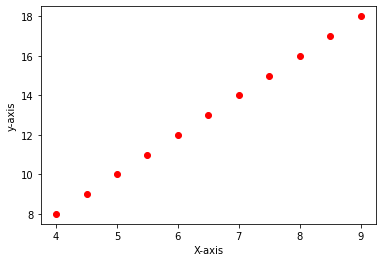

In [ ]:
# Basic data visualization
plt.plot(X, fx, 'ro')
plt.xlabel('X-axis')
plt.ylabel('y-axis')
plt.plot()

Output y: [ 7.63371053  9.04462846  9.02628068 11.23603508 13.05060914 13.4826509
 14.32680683 15.23728755 16.41002907 18.61678761 18.29321109]


[]

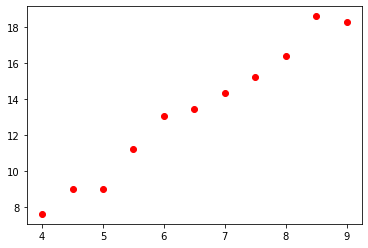

In [ ]:
# Introduce noise to output Y

# Draw samples from a standard normal distribution 
mu, sigma = 0, 1 # mean and standard deviation
noise = np.random.normal(mu, sigma, 11)

# Add noise samples to fx to get y train data
y = fx + noise
print(f'Output y: {y}')


# Visualize new data set after noise addition
plt.plot(X, y, 'ro')
plt.plot()

We will adopt a practice to first build intuition in code, before wrapping over concreate ideas into functions. Doing this will ensure ideas are experimented quickly and are reproducable many times. 

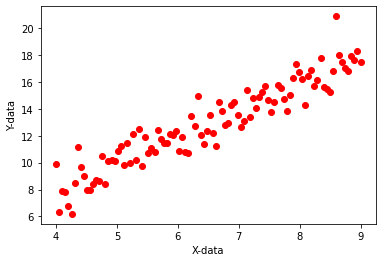

In [ ]:
# Wrap the data generation steps into a function
def gen_data(number_samples = 100, noise=1):
  X = np.linspace(4, 9, number_samples)
  mu, sigma = 0, noise # mean and standard deviation
  s = np.random.normal(mu, sigma, number_samples)
  y = 2*X + s
  return X, y

X, y = gen_data(100)

def vis_data(X, y, color='r'):
  plt.plot(X, y, color+'o')
  plt.xlabel('X-data')
  plt.ylabel('Y-data')
  plt.plot()

vis_data(X, y)

# Model development

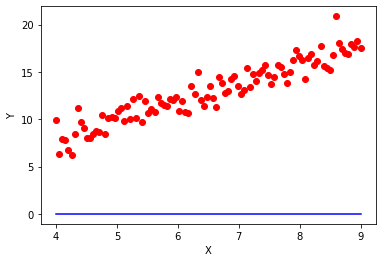

In [ ]:
# Weight initialization
w = 0

y_hat= w*X
y_hat.shape

plt.plot(X, y_hat, 'b')
plt.plot(X, y, 'ro')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# Error/Loss calculation

error = y - y_hat

def vanilla_loss(y, y_hat):
  return (y -  y_hat)

def squared_loss(y, y_hat):
  return (y -  y_hat)**2

def absolute_loss(y, y_hat):
  return np.abs(y -  y_hat)


loss = vanilla_loss(y, y_hat)
se_loss = squared_loss(y, y_hat)
abs_loss = absolute_loss(y, y_hat)

In [ ]:
# Cost Calculation

l_cost = np.mean(loss)
se_cost = np.mean(se_loss)
abs_cost = np.mean(abs_loss)

print(l_cost, se_cost, abs_cost)

12.900134223175744 175.9221482608199 12.900134223175744


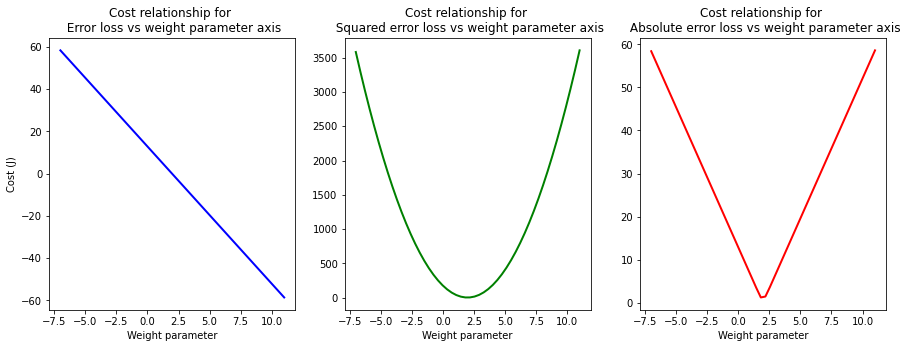

In [ ]:
# Visualize cost vs weights relationship

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#fig.suptitle('Comparision of different cost function relationship with training weight parameter \n\n')

wrange = np.linspace(-7, 11)

cost_values = [np.mean(vanilla_loss(y, w*X)) for w in wrange]
ax1.plot(wrange, cost_values, 'b', linewidth=2)
ax1.set_title('Cost relationship for \n Error loss vs weight parameter axis')
ax1.set_ylabel('Cost (J)')
ax1.set_xlabel('Weight parameter')

cost_values = [np.mean(squared_loss(y, w*X)) for w in wrange]
ax2.plot(wrange, cost_values, 'g',  linewidth=2)
ax2.set_title('Cost relationship for \n Squared error loss vs weight parameter axis')
ax2.set_xlabel('Weight parameter')

cost_values = [np.mean(absolute_loss(y, w*X)) for w in wrange]
ax3.plot(wrange, cost_values, 'r',  linewidth=2)
ax3.set_title('Cost relationship for \n Absolute error loss vs weight parameter axis')
ax3.set_xlabel('Weight parameter')

plt.show()
fig.savefig('cost_functions.png', dpi=100)

In [ ]:
# compute the loss derivative
dloss_dw = -2 * X *(y - y_hat)
dloss_dw;

In [ ]:
# compute the loss derivative
dcost_dw = 1/X.shape[0] * np.sum(dloss_dw)
dcost_dw

-176.15822678102901

In [ ]:
# Update the weeight parameter
alpha = 0.01
w = w - alpha*dcost_dw
w

1.7615822678102901

In [ ]:
def fit_regressor(X, y, w, alpha = 0.01):
  y_hat= w*X
  se_loss = squared_loss(y, y_hat)
  se_cost = np.mean(se_loss)
  dloss_dw = -2 * X *(y - y_hat)
  dcost_dw = 1/X.shape[0] * np.sum(dloss_dw)
  w = w - alpha*dcost_dw
  return dcost_dw


In [ ]:
def forward_pass(X, y, w):
  y_hat = w*X
  return y_hat

w = 0
y_hat = forward_pass(X, y, w)
y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def compute_cost(y, y_hat):
    loss = (y - y_hat)**2
    cost = (1/y.shape[0]) * np.sum(loss)
    return cost

cost = compute_cost(y, y_hat)
cost

175.92214826081994

In [ ]:
def compute_gradient(X, y, y_hat):
  dloss_dw = -2 * X *(y - y_hat)
  dcost_dw = 1/X.shape[0] * np.sum(dloss_dw)
  return dcost_dw

dw = compute_gradient(X, y, y_hat)
dw

-176.15822678102901

In [ ]:
# 2nd Update parameter
def update_gradient(w, dw, alpha=0.1):
  w = w - alpha*dw
  return w
w = update_gradient(w, dw)
w

17.6158226781029

In [ ]:
# fit function
def fit_regressor(X, y, w, epochs, alpha=0.01):
  history = {'cost':[], 'w':[]}
  for i in range(epochs):
    y_hat = forward_pass(X, y, w)
    cost = compute_cost(y, y_hat)
    dw = compute_gradient(X, y, y_hat)
    w = update_gradient(w, dw, alpha)
    if i%5 == 0:
      print(f'Train epochs {i} ---> J(w) = {cost} @ w = {w}')
      history['cost'].append(cost)
      history['w'].append(w)
  return history

w = 0 #np.random.randint(10)
epochs= 60
alpha= 0.001
history = fit_regressor(X, y, w, epochs, alpha)


Train epochs 0 ---> J(w) = 175.92214826081994 @ w = 0.17615822678102902
Train epochs 5 ---> J(w) = 70.11718299198056 @ w = 0.8484048647521395
Train epochs 10 ---> J(w) = 28.345935027602085 @ w = 1.2707955571131313
Train epochs 15 ---> J(w) = 11.854864385802376 @ w = 1.536195020517908
Train epochs 20 ---> J(w) = 5.34427578321275 @ w = 1.7029526608954222
Train epochs 25 ---> J(w) = 2.7739293895268027 @ w = 1.8077309836076445
Train epochs 30 ---> J(w) = 1.7591700510383432 @ w = 1.873566029519382
Train epochs 35 ---> J(w) = 1.358548361456316 @ w = 1.9149319643616942
Train epochs 40 ---> J(w) = 1.2003850097372495 @ w = 1.9409232968151184
Train epochs 45 ---> J(w) = 1.1379429441239068 @ w = 1.9572543519521446
Train epochs 50 ---> J(w) = 1.113291142580231 @ w = 1.9675155943246359
Train epochs 55 ---> J(w) = 1.1035587400182807 @ w = 1.9739630096412548


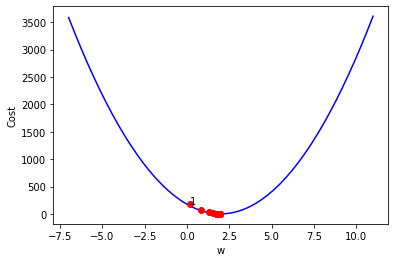

In [ ]:

cost = [compute_cost(y, forward_pass(X, y, w)) for w in wrange]
plt.plot(wrange, cost, 'b')
plt.plot(history['w'], history['cost'], 'ro')
plt.annotate('1', xy=(history['w'][0],  history['cost'][0]), xytext=(history['w'][0],  history['cost'][0]))
plt.xlabel('w')
plt.ylabel('Cost')
plt.show()

In [ ]:
compute_cost(y, forward_pass(X, y, history['w'][0]))

146.26747307195157

In [ ]:
history['w'][0], history['cost'][0]

(0.17615822678102902, 175.92214826081994)

Text(0.17615822678102902, 175.92214826081994, '1')

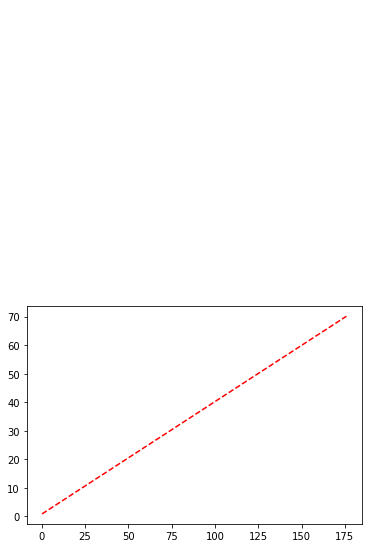

In [ ]:
plt.plot([history['w'][0], history['cost'][0]], [history['w'][1],history['cost'][1]], 'r--')
plt.annotate('1', xy=(history['w'][0],  history['cost'][0]), xytext=(history['w'][0],  history['cost'][0]))


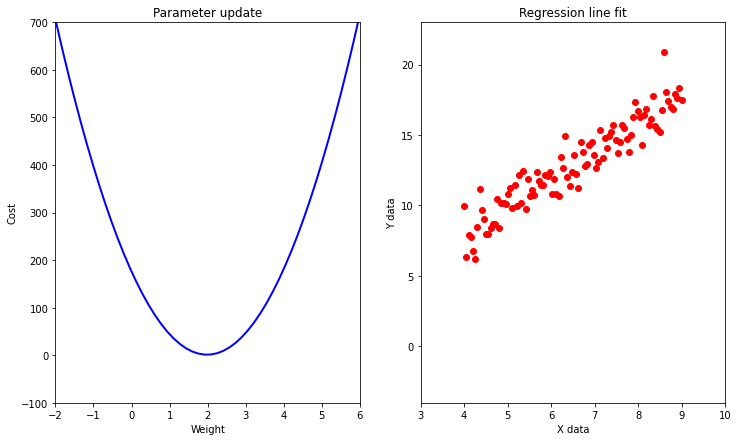

In [ ]:
# Animations
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 7))
param_start, param_stop = -2, 6
ax1.set_xlim(param_start, param_stop)
ax1.set_ylim(-100, 700)

wrange1 = np.linspace(param_start, param_stop)
cost = [compute_cost(y, forward_pass(X, y, w)) for w in wrange1]
plt.plot(wrange1, cost)
cost_curve, = ax1.plot(wrange1, cost, 'b', lw=2)
point, = ax1.plot([], [], 'r.', ms=20)
ax1.set_xlabel('Weight')
ax1.set_ylabel('Cost')
ax1.set_title('Parameter update')

# Animations
ax2.set_xlim(3, 10)
ax2.set_ylim(-4, 23)

data_points, = ax2.plot(X, y, 'ro')
line, = ax2.plot([], [], 'b', lw=2)
ax2.set_xlabel('X data')
ax2.set_ylabel('Y data')
ax2.set_title('Regression line fit')
plt.show()

In [ ]:
X_data = []
y_data = []
X_weight = []
y_weight = []
x_shift, y_shift = 0.01, 10
def cost_regline_update(n):
  X_data.append(history['w'][n])
  y_data.append(history['cost'][n])
  ax1.annotate(str(n),
              xy=(X_data[n]+x_shift,  y_data[n]+y_shift), 
              xytext=(X_data[n]+x_shift, y_data[n]+y_shift))

  line_eqtn = history['w'][n]*X
  X_weight.append(X)
  y_weight.append(line_eqtn)
    
  point.set_data(X_data, y_data)
  line.set_data(X, line_eqtn)
  return point, line

In [ ]:
animation = FuncAnimation(fig,
                          func=cost_regline_update,
                          frames=len(history['w']),
                          interval=1000,
                          blit=True)


In [ ]:
from IPython.display import HTML
HTML(animation.to_html5_video())